# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# import the libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# load the mnist dataset into training and testing dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


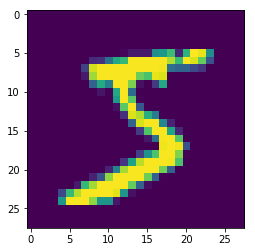

In [135]:
# plot the image using matplotlib
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# reshape the train and test dataset
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# preprocess the train and test images by dividing the pixel values by 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [138]:
# get the first ten labels of training set
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [140]:
# get the first ten labels of training set again to verify if it is 10-dimensional class matrices
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [149]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

# convolution layer with kernel size of (3x3x10)
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))   
#  batch normalization layer
model.add(BatchNormalization())
# convolution layer with kernel size of (3x3x18)
model.add(Convolution2D(18, 3,3, activation='relu'))             
# batch normalization layer
model.add(BatchNormalization())

# max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))                     
# dropout layer 
model.add(Dropout(0.25))

# convolution layer with kernel size of (3x3x30)
model.add(Convolution2D(30, 3,3, activation='relu'))         
model.add(BatchNormalization())
# convolution layer with kernel size of (3x3x40)             
model.add(Convolution2D(40, 3,3, activation='relu'))
model.add(BatchNormalization())

# max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 1x1 convolution
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 2))
model.add(Flatten())
# apply the softmax 
model.add(Activation('softmax'))	

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu")`
  


In [150]:
# print the model summary 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_111 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 24, 24, 18)        1638      
_________________________________________________________________
batch_normalization_112 (Bat (None, 24, 24, 18)        72        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 18)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 12, 12, 18)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 10, 10, 30)        4890      
__________

In [0]:
INIT_LR = 5e-3
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch


In [0]:
# compile the model with categorical_crossentropy as loss and adam optimizer and metrics as accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [153]:
# train the model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1,callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 29s 490us/step - loss: 0.1558 - acc: 0.9526
Epoch 2/20
60000/60000 [==============================] - 21s 342us/step - loss: 0.0679 - acc: 0.9788
Epoch 3/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0555 - acc: 0.9830
Epoch 4/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0491 - acc: 0.9848
Epoch 5/20
60000/60000 [==============================] - 22s 360us/step - loss: 0.0423 - acc: 0.9863
Epoch 6/20
60000/60000 [==============================] - 21s 342us/step - loss: 0.0363 - acc: 0.9887
Epoch 7/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0325 - acc: 0.9899
Epoch 8/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0305 - acc: 0.9908
Epoch 9/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.0283 - acc: 0.9909
Epoch 10/20
60000/60000 [==============================] - 20s 341us/step - loss: 

In [0]:
# evaluate the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [155]:
# print the validation loss and accuracy 
print(score)

[0.019009883882767645, 0.9948]


In [0]:
# get the predicted label for test images
y_pred = model.predict(X_test)

In [157]:
# priint the first 9 predicted value and actual label
print(y_pred[:9])
print(y_test[:9])

[[5.7990716e-11 3.4489535e-08 1.4616522e-08 2.6304861e-07 5.0617122e-13
  1.8249730e-09 4.8775914e-15 9.9999964e-01 8.0708086e-13 3.2975206e-10]
 [2.2810278e-09 4.6915218e-08 1.0000000e+00 9.2984713e-09 8.1859825e-14
  1.4805351e-13 1.9187720e-08 1.4757466e-11 1.2243830e-10 2.3798168e-15]
 [1.9067392e-11 9.9999535e-01 1.9857143e-08 6.4714945e-09 6.9869550e-08
  6.1330048e-09 1.5178339e-09 4.5819129e-06 2.6729563e-09 8.9259879e-09]
 [9.9999845e-01 2.2613625e-12 1.4823176e-07 2.2259606e-11 5.5751508e-11
  1.6633672e-09 1.3886183e-06 5.3012192e-11 6.7393291e-09 9.2129554e-10]
 [1.0975557e-11 7.4497684e-09 1.0718401e-08 8.7793862e-11 9.9999928e-01
  2.9263186e-11 2.5263433e-10 1.8116062e-09 1.3542204e-07 5.3197800e-07]
 [3.7546213e-11 9.9999499e-01 2.0207376e-07 1.9922946e-09 1.1996457e-08
  1.4092444e-09 4.3777368e-09 4.7895765e-06 9.1358943e-10 3.1664309e-09]
 [3.2645210e-12 6.7337310e-06 8.2404430e-09 7.8236098e-12 9.9996030e-01
  1.5497960e-09 1.3051822e-11 6.4256074e-07 6.2710419e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

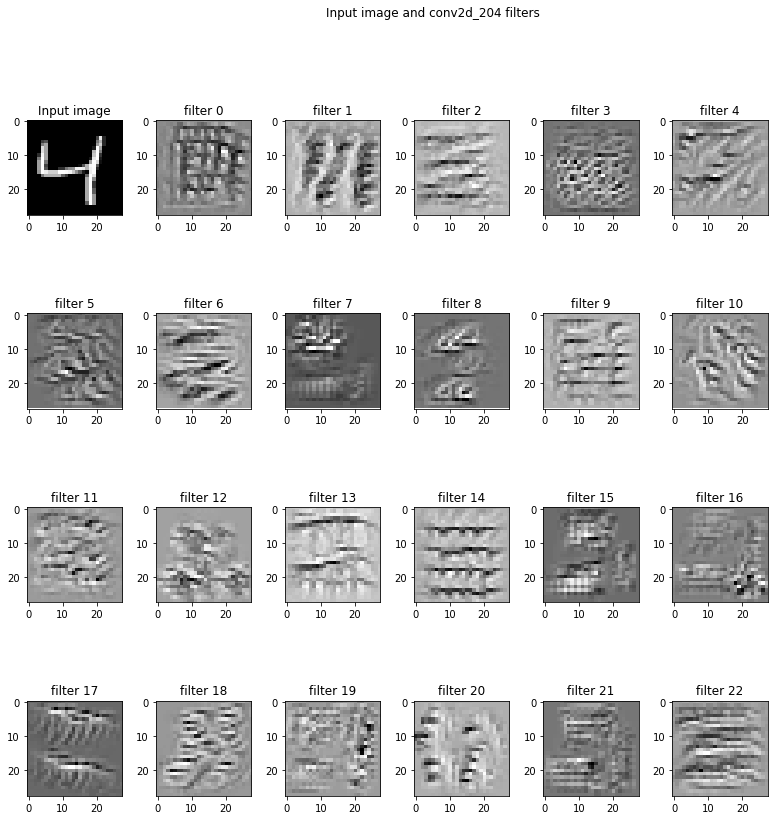

In [160]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_204'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()